In [1]:
# Section 1: Data Cleaning

import pandas as pd
import re

# Load the dataset
data = pd.read_csv('tweets-data/combined_data_tugas_IR.csv')

# Preview the dataset
print("Before cleaning:")
print(data.head())

Before cleaning:
   conversation_id_str                      created_at  favorite_count  \
0  1816413088884641999  Thu Jul 25 10:00:02 +0000 2024               1   
1  1814208553554461133  Fri Jul 19 08:00:00 +0000 2024               0   
2  1825410755627536706  Mon Aug 19 05:53:33 +0000 2024              23   
3  1823287509176164761  Tue Aug 13 09:16:31 +0000 2024               2   
4  1820790421993501127  Tue Aug 06 11:53:59 +0000 2024               9   

                                           full_text               id_str  \
0  Jelang pelantikan presiden pada 20 Oktober 202...  1816413088884641999   
1  Lima orang mengajukan permohonan uji materi ke...  1814208553554461133   
2  Presiden Joko Widodo melantik politikus Partai...  1825410755627536706   
3  Indonesia Kebal Resesi 2024 Prabowo Optimis Me...  1823287509176164761   
4  Menko Marves Luhut Binsar Pandjaitan bercerita...  1820790421993501127   

                                         image_url in_reply_to_screen_name 

In [2]:
# Define a function to clean text by removing URLs, mentions, hashtags, and special characters
def clean_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    
    # Remove mentions and hashtags
    text = re.sub(r'\@\w+|\#', '', text)
    
    # Remove special characters
    text = re.sub(r'\W', ' ', text)
    
    return text

# Apply the clean_text function to the 'full_text' column
data['cleaned_text'] = data['full_text'].apply(clean_text)
data[['full_text', 'cleaned_text']].to_csv('tweets-data/cleaned_data_tugas_IR.csv', index=False)
# Preview the cleaned data
print("After cleaning:")
data[['full_text', 'cleaned_text']].head()

After cleaning:


,full_text,cleaned_text
0,Jelang pelantikan presiden pada 20 Oktober 202...,Jelang pelantikan presiden pada 20 Oktober 202...
1,Lima orang mengajukan permohonan uji materi ke...,Lima orang mengajukan permohonan uji materi ke...
2,Presiden Joko Widodo melantik politikus Partai...,Presiden Joko Widodo melantik politikus Partai...
3,Indonesia Kebal Resesi 2024 Prabowo Optimis Me...,Indonesia Kebal Resesi 2024 Prabowo Optimis Me...
4,Menko Marves Luhut Binsar Pandjaitan bercerita...,Menko Marves Luhut Binsar Pandjaitan bercerita...


In [3]:
data.shape

(2240, 16)

In [4]:
# Section 2: Lowercasing and Tokenization

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

# Define a function to lowercase and tokenize the text
def tokenize_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    return tokens

# Apply the tokenization function to the 'cleaned_text' column
data['tokens'] = data['cleaned_text'].apply(tokenize_text)
data[['full_text', 'cleaned_text', 'tokens']].to_csv('tweets-data/lowercase_tokenized_data_tugas_IR.csv', index=False)

# Preview the tokenized data
data[['full_text', 'cleaned_text', 'tokens']].head()


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/astronaut/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,full_text,cleaned_text,tokens
0,Jelang pelantikan presiden pada 20 Oktober 202...,Jelang pelantikan presiden pada 20 Oktober 202...,"[jelang, pelantikan, presiden, pada, 20, oktob..."
1,Lima orang mengajukan permohonan uji materi ke...,Lima orang mengajukan permohonan uji materi ke...,"[lima, orang, mengajukan, permohonan, uji, mat..."
2,Presiden Joko Widodo melantik politikus Partai...,Presiden Joko Widodo melantik politikus Partai...,"[presiden, joko, widodo, melantik, politikus, ..."
3,Indonesia Kebal Resesi 2024 Prabowo Optimis Me...,Indonesia Kebal Resesi 2024 Prabowo Optimis Me...,"[indonesia, kebal, resesi, 2024, prabowo, opti..."
4,Menko Marves Luhut Binsar Pandjaitan bercerita...,Menko Marves Luhut Binsar Pandjaitan bercerita...,"[menko, marves, luhut, binsar, pandjaitan, ber..."


In [5]:
# Section 3: Stopwords Removal and Stemming (Bahasa Indonesia)

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
import nltk

# Load Indonesian stopwords from NLTK (optional, for additional stopwords)
nltk.download('stopwords')
indonesian_stopwords = set(stopwords.words('indonesian'))

# You can also add custom stopwords specific to your dataset
custom_stopwords = set([
    'dengan', 'ia', 'bahwa', 'oleh', 'akan', 'untuk'  # Add other stopwords as needed
])

# Combine both sets of stopwords
all_stopwords = indonesian_stopwords.union(custom_stopwords)

# Initialize Indonesian stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Define a function to remove stopwords and stem tokens (for Bahasa Indonesia)
def stem_and_remove_stopwords(tokens):
    # Remove stopwords
    tokens = [token for token in tokens if token not in all_stopwords]
    
    # Stem the tokens
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    return stemmed_tokens

# Apply the function to the 'tokens' column
data['stemmed_tokens'] = data['tokens'].apply(stem_and_remove_stopwords)

# Save intermediate result after stemming and stopwords removal (Bahasa Indonesia)
data[['tokens', 'stemmed_tokens']].to_csv('tweets-data/stopwords_stemming_lemmatization_data_tugas_IR.csv', index=False)

# Preview the stemmed and cleaned data
print("After stemming and stopwords removal, saved as 'tweets-data/stopwords_stemming_lemmatization_data_tugas_IR.csv'")
data[['tokens', 'stemmed_tokens']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/astronaut/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


After stemming and stopwords removal, saved as 'tweets-data/stopwords_stemming_lemmatization_data_tugas_IR.csv'


,tokens,stemmed_tokens
0,"[jelang, pelantikan, presiden, pada, 20, oktob...","[jelang, lantik, presiden, 20, oktober, 2024, ..."
1,"[lima, orang, mengajukan, permohonan, uji, mat...","[orang, aju, mohon, uji, materi, mahkamah, kon..."
2,"[presiden, joko, widodo, melantik, politikus, ...","[presiden, joko, widodo, lantik, politikus, pa..."
3,"[indonesia, kebal, resesi, 2024, prabowo, opti...","[indonesia, kebal, resesi, 2024, prabowo, opti..."
4,"[menko, marves, luhut, binsar, pandjaitan, ber...","[menko, marves, luhut, binsar, pandjaitan, cer..."


In [6]:
# Section 4: Saving Cleaned Data

# Join the lemmatized tokens back into a single string for each tweet
data['final_cleaned_text'] = data['stemmed_tokens'].apply(lambda x: ' '.join(x))

# Save the final cleaned dataset to a new CSV file
data[['full_text', 'final_cleaned_text']].to_csv('tweets-data/final_cleaned_data_tugas_IR.csv', index=False)

print("Final cleaned data saved as 'tweets-data/final_cleaned_data_tugas_IR.csv'")

Final cleaned data saved as 'tweets-data/final_cleaned_data_tugas_IR.csv'


First few rows of 'final_cleaned_text':
0    jelang lantik presiden 20 oktober 2024 pks dek...
1    orang aju mohon uji materi mahkamah konstitusi...
2    presiden joko widodo lantik politikus partai g...
3    indonesia kebal resesi 2024 prabowo optimis je...
4    menko marves luhut binsar pandjaitan cerita pr...
Name: final_cleaned_text, dtype: object


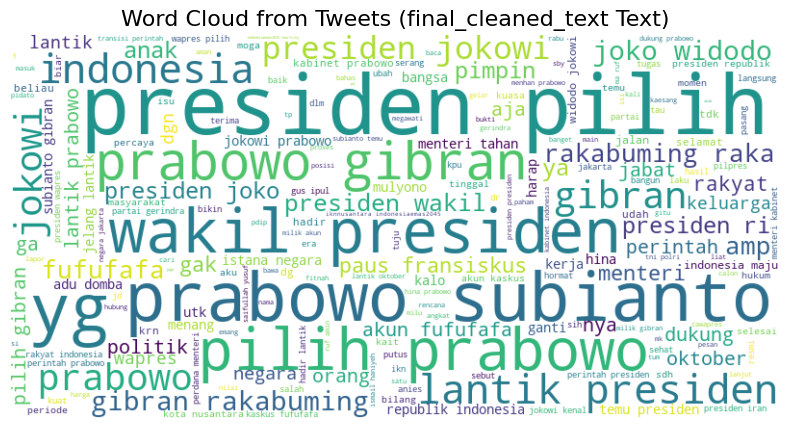

In [7]:
# Import necessary libraries
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the combined CSV file
# Make sure the file is in the 'tweets-data' directory or update the path if it's elsewhere
data = pd.read_csv('tweets-data/final_cleaned_data_tugas_IR.csv')

# Check if the 'full_text' column exists, print first few rows
if 'final_cleaned_text' in data.columns:
    print("First few rows of 'final_cleaned_text':")
    print(data['final_cleaned_text'].head())
else:
    print("'final_cleaned_text' column not found!")

# Combine all the text in the 'full_text' column
text = " ".join(tweet for tweet in data['final_cleaned_text'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200, colormap='viridis').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud from Tweets (final_cleaned_text Text)', fontsize=16)
plt.show()


In [8]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
data = pd.read_csv('tweets-data/combined_data_tugas_IR.csv')

# Step 1: Data Cleaning (Remove URLs, mentions, hashtags, special characters)
def clean_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    
    # Remove mentions and hashtags
    text = re.sub(r'\@\w+|\#', '', text)
    
    # Remove special characters and numbers
    text = re.sub(r'\W', ' ', text)
    
    return text

# Apply cleaning function
data['cleaned_text'] = data['full_text'].apply(clean_text)

# Step 2: Lowercasing and Tokenization
def tokenize_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    return tokens

# Apply tokenization function
data['tokens'] = data['cleaned_text'].apply(tokenize_text)

# Step 3: Stopwords Removal and Stemming for Bahasa Indonesia
# Load Indonesian stopwords from NLTK
indonesian_stopwords = set(stopwords.words('indonesian'))

# Add any custom stopwords you want to include
custom_stopwords = set(['dengan', 'ia', 'bahwa', 'oleh', 'akan', 'untuk'])

# Combine default and custom stopwords
all_stopwords = indonesian_stopwords.union(custom_stopwords)

# Initialize the Indonesian stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Define a function to stem tokens and remove stopwords
def stem_and_remove_stopwords(tokens):
    # Remove stopwords
    tokens = [token for token in tokens if token not in all_stopwords]
    
    # Stem the tokens
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    return stemmed_tokens

# Apply stemming and stopwords removal
data['stemmed_tokens'] = data['tokens'].apply(stem_and_remove_stopwords)

# Step 4: Join stemmed tokens back into a single string
data['final_cleaned_text'] = data['stemmed_tokens'].apply(lambda x: ' '.join(x))

# Save the final result with all intermediate steps
data.to_csv('tweets-data/preprocessed_data_full.csv', index=False)

print("All steps completed. Data saved to 'tweets-data/preprocessed_data_full.csv'")
data.head()


[nltk_data] Downloading package punkt to /Users/astronaut/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/astronaut/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


All steps completed. Data saved to 'tweets-data/preprocessed_data_full.csv'


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,cleaned_text,tokens,stemmed_tokens,final_cleaned_text
0,1816413088884641999,Thu Jul 25 10:00:02 +0000 2024,1,Jelang pelantikan presiden pada 20 Oktober 202...,1816413088884641999,https://pbs.twimg.com/media/GTQl6eFbAAA1X-m.jpg,NaN,in,"DKI Jakarta, Indonesia",0,0,0,https://x.com/_rakyatmerdeka/status/1816413088...,1474011848118657029,_rakyatmerdeka,Jelang pelantikan presiden pada 20 Oktober 202...,"[jelang, pelantikan, presiden, pada, 20, oktob...","[jelang, lantik, presiden, 20, oktober, 2024, ...",jelang lantik presiden 20 oktober 2024 pks dek...
1,1814208553554461133,Fri Jul 19 08:00:00 +0000 2024,0,Lima orang mengajukan permohonan uji materi ke...,1814208553554461133,https://pbs.twimg.com/media/GSyBIOqaEAAOp14.jpg,NaN,in,"DKI Jakarta, Indonesia",0,0,1,https://x.com/_rakyatmerdeka/status/1814208553...,1474011848118657029,_rakyatmerdeka,Lima orang mengajukan permohonan uji materi ke...,"[lima, orang, mengajukan, permohonan, uji, mat...","[orang, aju, mohon, uji, materi, mahkamah, kon...",orang aju mohon uji materi mahkamah konstitusi...
2,1825410755627536706,Mon Aug 19 05:53:33 +0000 2024,23,Presiden Joko Widodo melantik politikus Partai...,1825410755627536706,https://pbs.twimg.com/media/GVUpUSba8AA1Hod.jpg,NaN,in,"DKI Jakarta, Indonesia",0,0,8,https://x.com/dekade_08/status/182541075562753...,1576913175227748352,dekade_08,Presiden Joko Widodo melantik politikus Partai...,"[presiden, joko, widodo, melantik, politikus, ...","[presiden, joko, widodo, lantik, politikus, pa...",presiden joko widodo lantik politikus partai g...
3,1823287509176164761,Tue Aug 13 09:16:31 +0000 2024,2,Indonesia Kebal Resesi 2024 Prabowo Optimis Me...,1823287509176164761,https://pbs.twimg.com/media/GU2eU6ibAAA1pQr.jpg,NaN,in,NaN,0,0,0,https://x.com/didik_lp/status/1823287509176164761,1517576896787410944,didik_lp,Indonesia Kebal Resesi 2024 Prabowo Optimis Me...,"[indonesia, kebal, resesi, 2024, prabowo, opti...","[indonesia, kebal, resesi, 2024, prabowo, opti...",indonesia kebal resesi 2024 prabowo optimis je...
4,1820790421993501127,Tue Aug 06 11:53:59 +0000 2024,9,Menko Marves Luhut Binsar Pandjaitan bercerita...,1820790421993501127,https://pbs.twimg.com/media/GUS_HPyboAA3Bj2.jpg,NaN,in,"DKI Jakarta, Indonesia",0,0,6,https://x.com/dekade_08/status/182079042199350...,1576913175227748352,dekade_08,Menko Marves Luhut Binsar Pandjaitan bercerita...,"[menko, marves, luhut, binsar, pandjaitan, ber...","[menko, marves, luhut, binsar, pandjaitan, cer...",menko marves luhut binsar pandjaitan cerita pr...


/var/folders/ll/6h_tm90s3hncpljylwsytscw0000gn/T/ipykernel_5385/1306993849.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['created_at'], errors='coerce')  # Ensure it handles invalid dates
/var/folders/ll/6h_tm90s3hncpljylwsytscw0000gn/T/ipykernel_5385/1306993849.py:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['month_year'] = data['date'].dt.to_period('M')


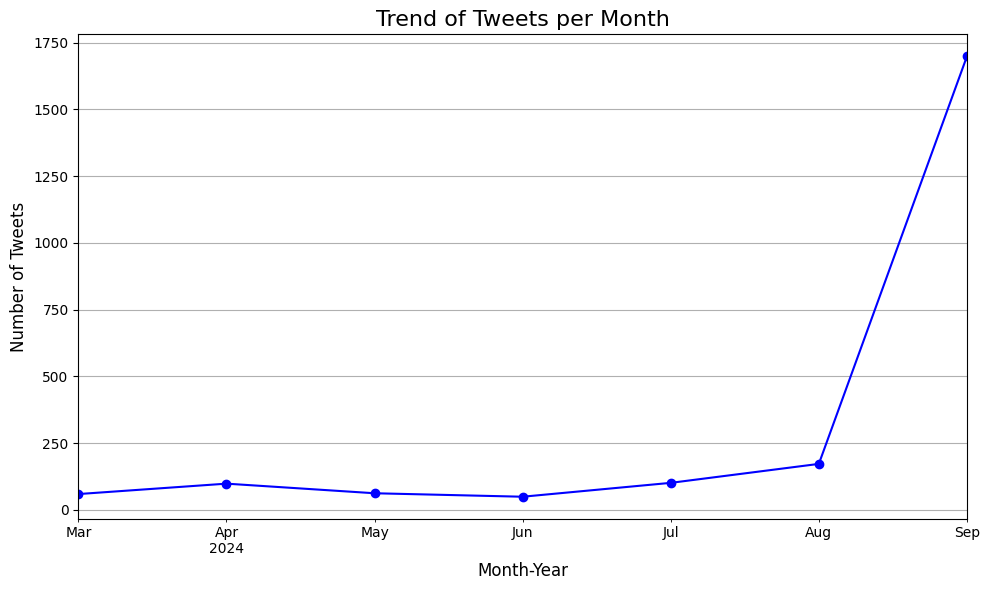

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('tweets-data/preprocessed_data_full.csv')

# Replace 'created_at' with the correct column name that contains the date
data['date'] = pd.to_datetime(data['created_at'], errors='coerce')  # Ensure it handles invalid dates

# Drop rows where the date could not be converted
data = data.dropna(subset=['date'])

# Extract the month and year from the 'date' column
data['month_year'] = data['date'].dt.to_period('M')

# Count the number of tweets per month
tweets_per_month = data.groupby('month_year').size()

# Plot the trend of tweets over months
plt.figure(figsize=(10, 6))
tweets_per_month.plot(kind='line', marker='o', color='b')
plt.title('Trend of Tweets per Month', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [10]:
import pandas as pd

# Load the dataset
data = pd.read_csv('tweets-data/preprocessed_data_full.csv')

# Check the columns to find retweet and favorite count fields
print(data.columns)

# Sort by retweet_count and favorite_count to get most popular tweets
# Replace 'retweet_count' and 'favorite_count' with the correct column names in your dataset

# Create a popularity score by summing retweet and favorite counts
data['popularity'] = data['retweet_count'] + data['favorite_count']

# Sort the data based on the popularity score
most_popular_tweets = data.sort_values(by='popularity', ascending=False).head(10)

# Display the 10 most popular tweets
print("Top 10 Most Popular Tweets:")
print(most_popular_tweets[['full_text', 'retweet_count', 'favorite_count', 'popularity']])


Index(['conversation_id_str', 'created_at', 'favorite_count', 'full_text',
       'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location',
       'quote_count', 'reply_count', 'retweet_count', 'tweet_url',
       'user_id_str', 'username', 'cleaned_text', 'tokens', 'stemmed_tokens',
       'final_cleaned_text'],
      dtype='object')
Top 10 Most Popular Tweets:
                                              full_text  retweet_count  \
2015  FIX CLEAR! Fufufafa adalah Wakil Presiden terp...          19034   
217   Prabowo sedih ada tradisi menjelekkan pemimpin...          11298   
339    RESMI : KPU mengumumkan hasil Pilpres 2024. 1...           6997   
1025   Kalau demokrasi kita tidak berjalan tidak mun...          13437   
394   gini ya gibran goblok kalo lo emang bukan pemi...           7489   
215   ini orang kalo nyalon jadi capres prabowo gibr...           4742   
1070   Kalau Presiden Jokowi Diktator anda tidak aka...          11662   
2040  Bayangkan Gibran batal di